# NBA-Data-2010-2024 🏀

## Schema for Box_scores

### Dimensions
- **season_year**: The year of the basketball season.
- **game_date**: The date of the game.
- **gameId**: Unique identifier for the game.
- **teamId**: Unique identifier for the team.
- **teamCity**: The city where the team is based.
- **teamName**: The name of the team.
- **teamTricode**: A three-letter code representing the team.
- **teamSlug**: A unique identifier for the team.
- **personId**: Unique identifier for the person (player).
- **personName**: The name of the person (player).
- **position**: The position of the player.
- **comment**: Any additional comments or notes.
- **jerseyNum**: The jersey number of the player.

### Metrics
- **minutes**: The number of minutes played by the player.
- **fieldGoalsMade**: The number of field goals made by the player.
- **fieldGoalsAttempted**: The number of field goals attempted by the player.
- **fieldGoalsPercentage**: The shooting percentage for field goals.
- **threePointersMade**: The number of three-pointers made by the player.
- **threePointersAttempted**: The number of three-pointers attempted by the player.
- **threePointersPercentage**: The shooting percentage for three-pointers.
- **freeThrowsMade**: The number of free throws made by the player.
- **freeThrowsAttempted**: The number of free throws attempted by the player.
- **freeThrowsPercentage**: The shooting percentage for free throws.
- **reboundsOffensive**: The number of offensive rebounds by the player.
- **reboundsDefensive**: The number of defensive rebounds by the player.
- **reboundsTotal**: The total number of rebounds by the player.
- **assists**: The number of assists by the player.
- **steals**: The number of steals by the player.
- **blocks**: The number of blocks by the player.
- **turnovers**: The number of turnovers by the player.
- **foulsPersonal**: The number of personal fouls committed by the player.
- **points**: The total number of points scored by the player.
- **plusMinusPoints**: The plus-minus statistic for the player, indicating the team's score differential when the player is on the court.

## Schema of game totals 

### Dimensions
- **SEASON_YEAR**: The year of the NBA season.
- **TEAM_ID**: Unique identifier for the team.
- **TEAM_ABBREVIATION**: Abbreviated name of the team.
- **TEAM_NAME**: Full name of the team.
- **GAME_ID**: Unique identifier for the game.
- **GAME_DATE**: Date of the game.
- **MATCHUP**: Matchup details indicating the teams involved.
- **WL**: Outcome of the game (Win or Loss).

### Metrics
- **MIN**: Total minutes played in the game.
- **FGM**: Field goals made.
- **FGA**: Field goals attempted.
- **FG_PCT**: Field goal percentage.
- **FG3M**: Three-point field goals made.
- **FG3A**: Three-point field goals attempted.
- **FG3_PCT**: Three-point field goal percentage.
- **FTM**: Free throws made.
- **FTA**: Free throws attempted.
- **FT_PCT**: Free throw percentage.
- **OREB**: Offensive rebounds.
- **DREB**: Defensive rebounds.
- **REB**: Total rebounds.
- **AST**: Assists.
- **TOV**: Turnovers.
- **STL**: Steals.
- **BLK**: Blocks.
- **BLKA**: Opponent's blocks.
- **PF**: Personal fouls.
- **PFD**: Personal fouls drawn.
- **PTS**: Total points scored.
- **PLUS_MINUS**: Plus-minus statistic.
- **GP_RANK**: Rank based on games played.
- **W_RANK**: Rank based on wins.
- **L_RANK**: Rank based on losses.
- **W_PCT_RANK**: Rank based on win percentage.
- **MIN_RANK**: Rank based on minutes played.
- **Ranks for various statistical categories like field goals made, rebounds, assists, etc., indicated by suffix _RANK.**
- **AVAILABLE_FLAG**: Indicates if the data for this row is available.

## Authors

- [@NocturneBear](https://github.com/NocturneBear)

## License

[MIT](https://github.com/NocturneBear/NBA-Data-2010-2024/blob/main/LICENSE)

# NBA facts
Regular season each team makes 82 games.
The Best 8 teams of each conference (WEST & EAST), makes to the playoffs.
The goal with this model is to predict the probability of the winning a game between a specific matchup.
## Important Game Features 
- Home/ Away Game 
- Players List 
## Important Player Features
- season (season_year)
- position (position)
- team (teamId)
- time played (MIN)
- Field Goal Made (fieldGoalsMade)
- Field Goal Percentage (fieldGoalsPercentage)
- Field Goal Made 3PT (treePointersMade)
- Field Goal Percentage 3PT (threePointersPercentage)
- Free throw made (freeThrowsMade)
- Free Throw (percentagefreeThrowsPercentage)
- assists
- rebounds 
- steals 
- turnovers
- foulsPersonal
- blocks 
- points 
- plusMinusPoints

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
pd.set_option('future.no_silent_downcasting', True)

In [123]:
NUM_GAMES=82
playoff_games_total=pd.read_csv("./datasets/NBA_DATA_2010_2024/play_off_totals_2010_2024.csv",delimiter=',',header=0)
regular_games_total=pd.read_csv("./datasets/NBA_DATA_2010_2024/regular_season_totals_2010_2024.csv",delimiter=',',header=0)
regular_season_all_parts=pd.concat([
        pd.read_csv("./datasets/NBA_DATA_2010_2024/regular_season_box_scores_2010_2024_part_1.csv",delimiter=',',header=0),
        pd.read_csv("./datasets/NBA_DATA_2010_2024/regular_season_box_scores_2010_2024_part_2.csv",delimiter=',',header=0),
        pd.read_csv("./datasets/NBA_DATA_2010_2024/regular_season_box_scores_2010_2024_part_3.csv",delimiter=',',header=0)])

## Some Utils Functions

In [124]:
def convert_min_to_float(min_str):
    if isinstance(min_str, str) and ':' in min_str:
        mins, secs = map(int, min_str.split(':'))
        return mins + secs / 60
    return 0.0  # handle empty or malformed entries

In [125]:
def convert_int_season_to_str(season):
    if isinstance(season, int):
        return f"{season}-{season%2000 +1 :02d}" 
    return season

# Data Studying

## Average Points Per-Game,Per-Teams Per-Season
Here i are looking for a correalation between the average points between seasons, since this might me an indicator of why we should or shouldn't use all seasons to train the model, since there can be or not a relation between this features

In [126]:
def getTeamAvgPointsBySeason(scores,season=None,teamname=None):
    """
    Function to get the average points of a team in a season
    :param teamname: team name :List[str]
    :param season: season: str or int or None (for all seasons) 
    :return: average points of the team 
    """
    season = convert_int_season_to_str(season)  # e.g. 2023 -> "2023-24"
    # Filter by season first
    season_scores=scores
    if season is not None:
        season_scores = scores[scores['SEASON_YEAR'] == season]
    # Assuming your DataFrame is called 'df' and the column is called 'result'
    season_scores.loc[:,'WL'] = season_scores['WL'].replace({'W': 1, 'L': 0}).infer_objects(copy=False)
    # Group by team and calculate averages
    team_avg = season_scores.groupby([ 'TEAM_ABBREVIATION','SEASON_YEAR']).agg(
        {
            'PTS': 'mean',
            'FG_PCT': 'mean',
            'FG3_PCT': 'mean',
            'FT_PCT': 'mean',
            'WL':'sum'
        }
    ).reset_index()
    # Optional filter by team name
    if teamname:
        team_avg = team_avg[team_avg['TEAM_ABBREVIATION'].isin(teamname)]
    
    return team_avg.sort_values(by=['SEASON_YEAR','WL'],ascending=True).reset_index(drop=True)

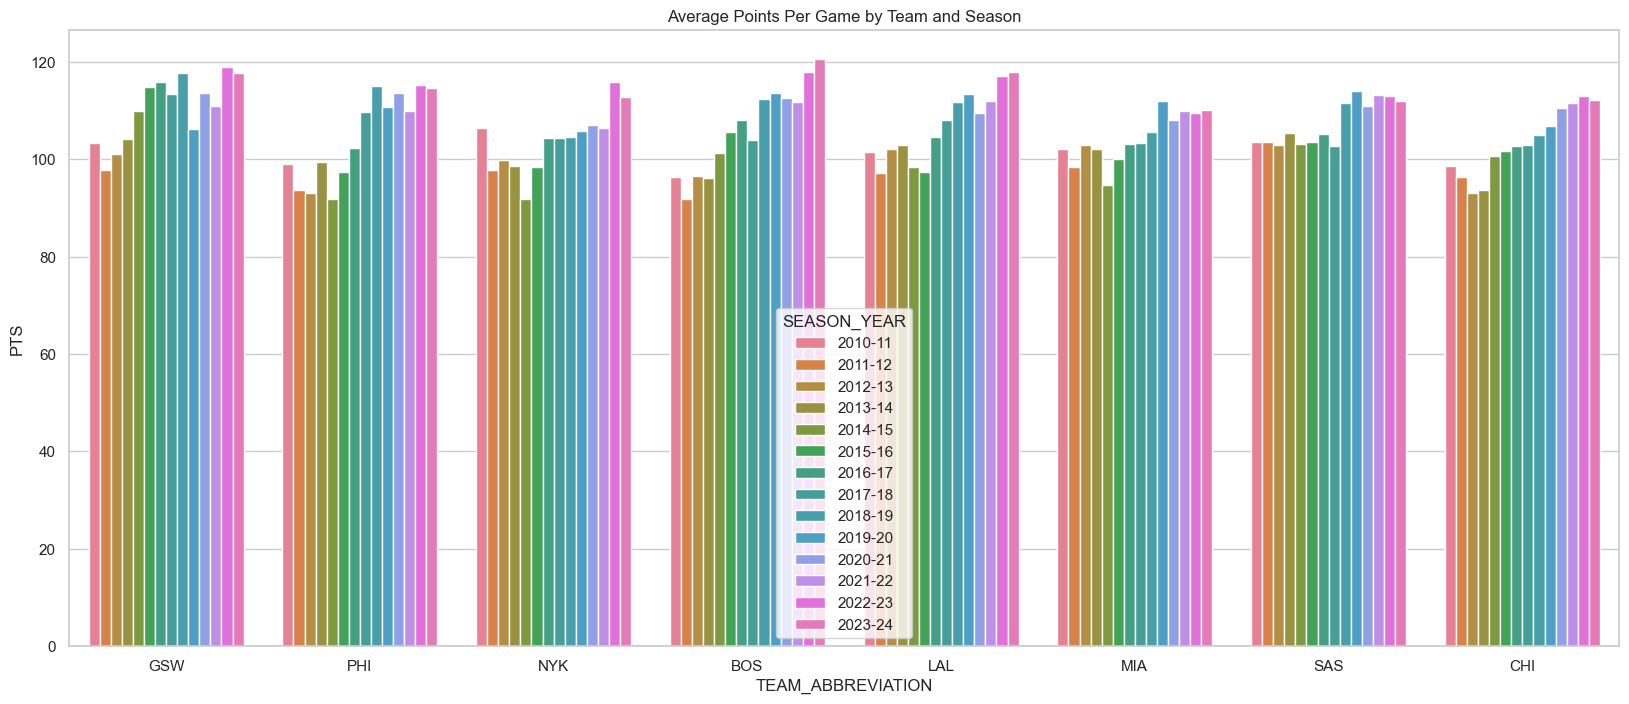

In [141]:
AveragePointsPerGameinSeason= getTeamAvgPointsBySeason(regular_games_total,teamname=["LAL","BOS","PHI","CHI","NYK","MIA","GSW","SAS"])
sns.set_theme(style="whitegrid")  # You can also try 'darkgrid', 'white', 'dark', or 'ticks'
plt.figure(figsize=(20, 8))  # Increase width and height for better readability
plt.tight_layout()
sns.barplot(data=AveragePointsPerGameinSeason, x='TEAM_ABBREVIATION', y='PTS', hue='SEASON_YEAR')
plt.title('Average Points Per Game by Team and Season')
plt.savefig('figures/average_points_per_game_by_team_and_season.png')

**As we can see on the above graphic, although there seems to be an overall raise of points in all teams throughout the seasons, there is no direct correlation of the average points per-game between seasons so we need more features to deduce and infer some feature relations and traits of the data in order to build a more accurate model.**

## Average Team Points Per Win Rate
Here we need to see if there is a correlation between the average points per-game and the win percentage on the regular season

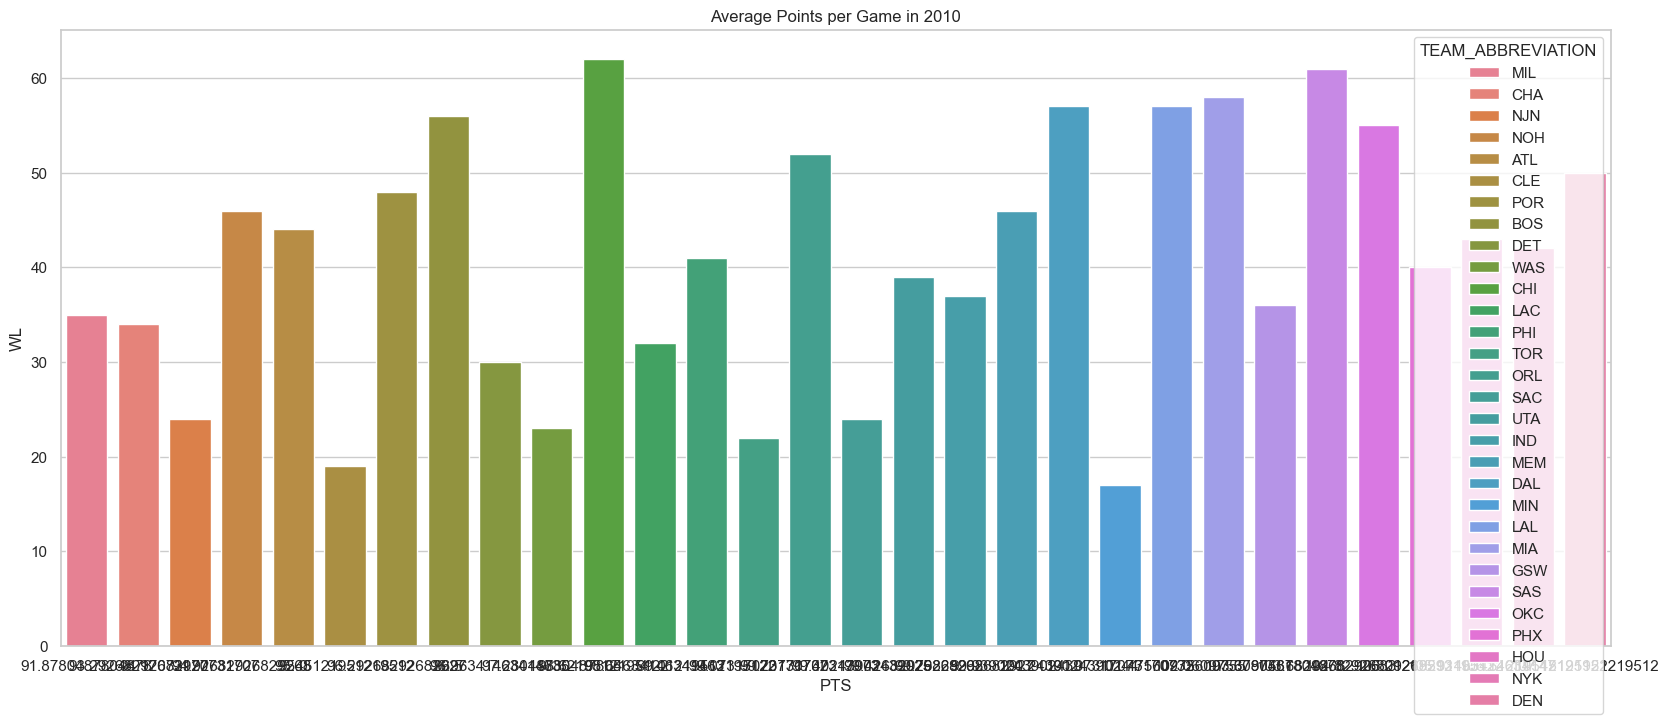

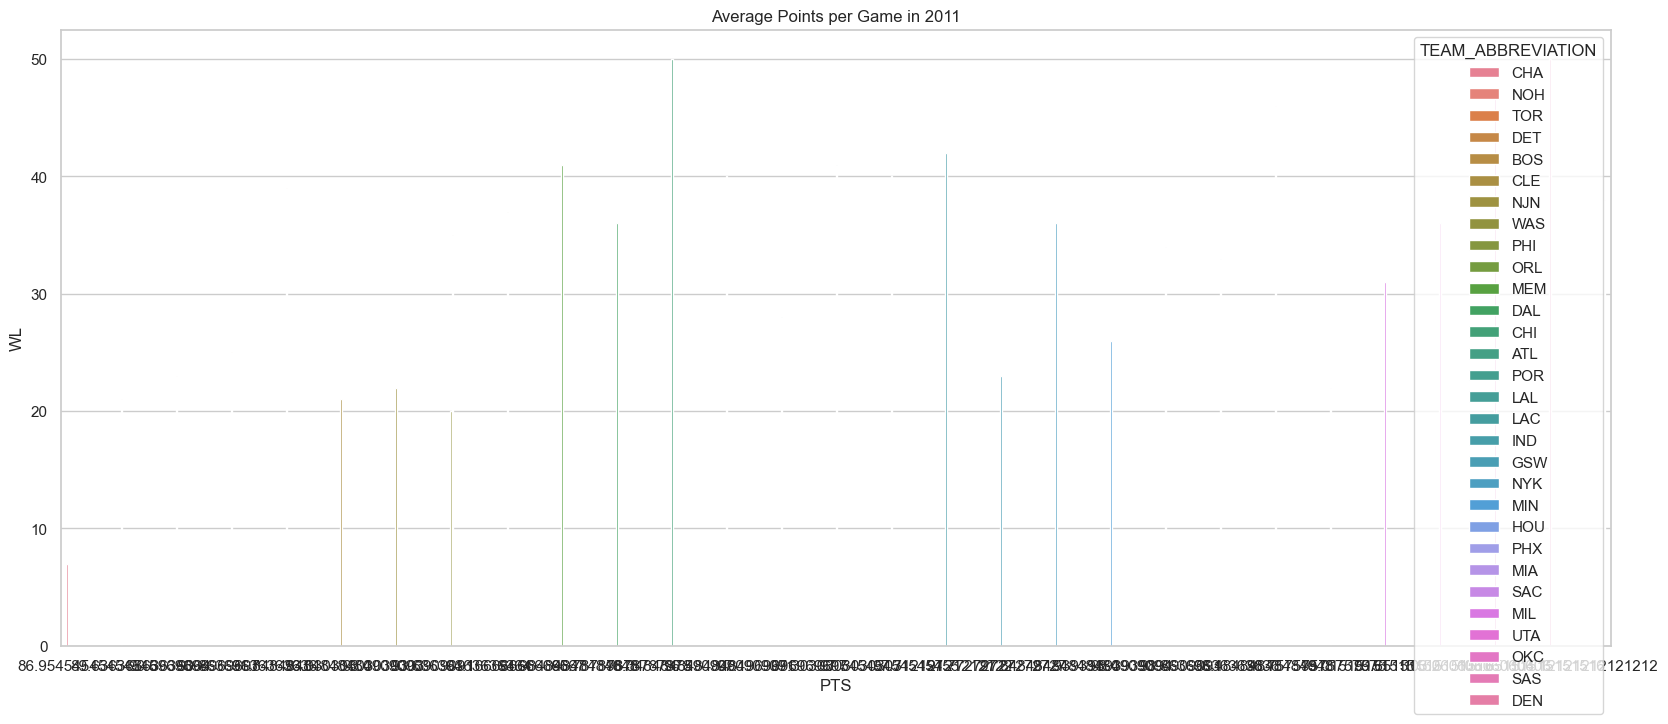

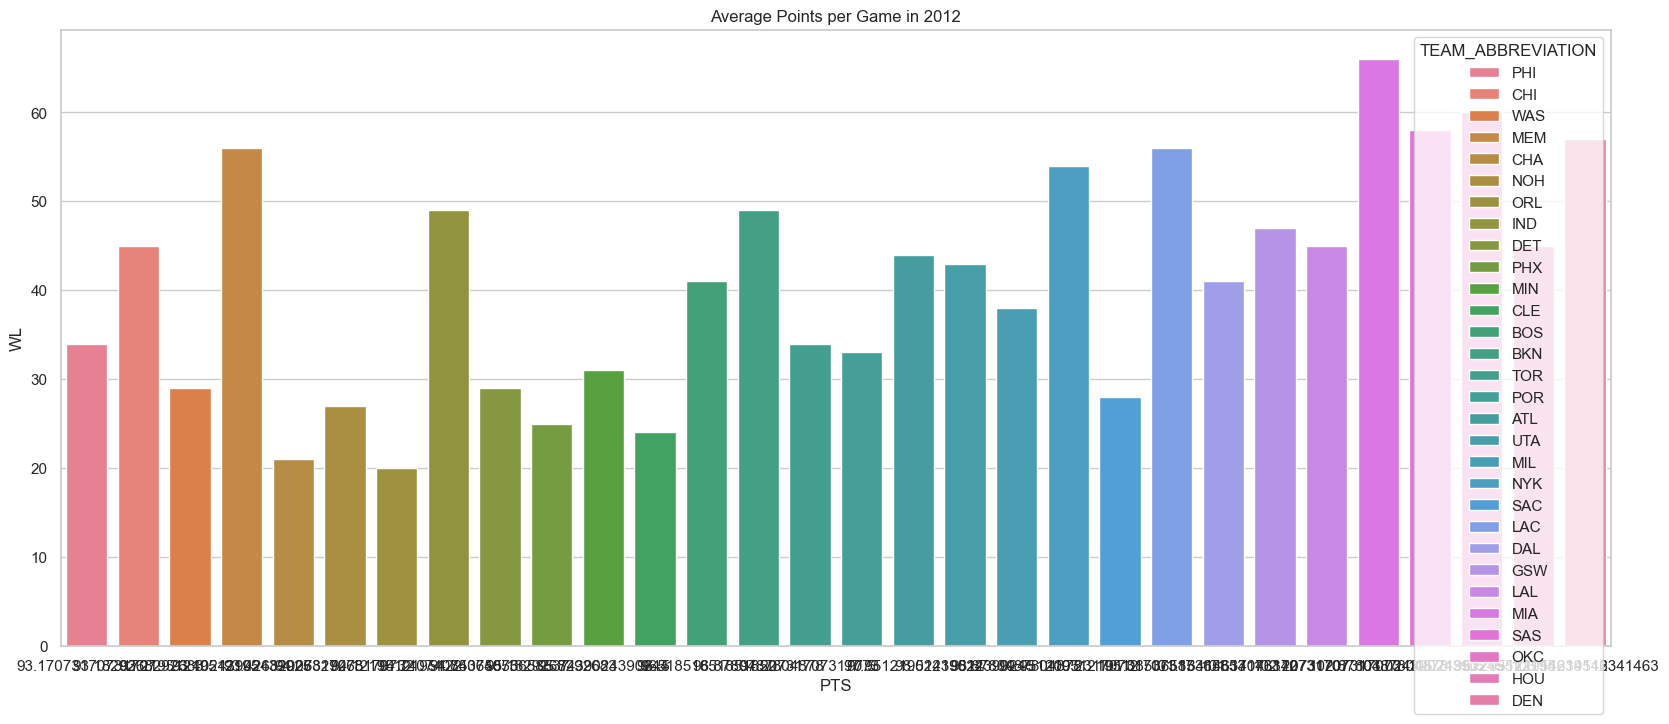

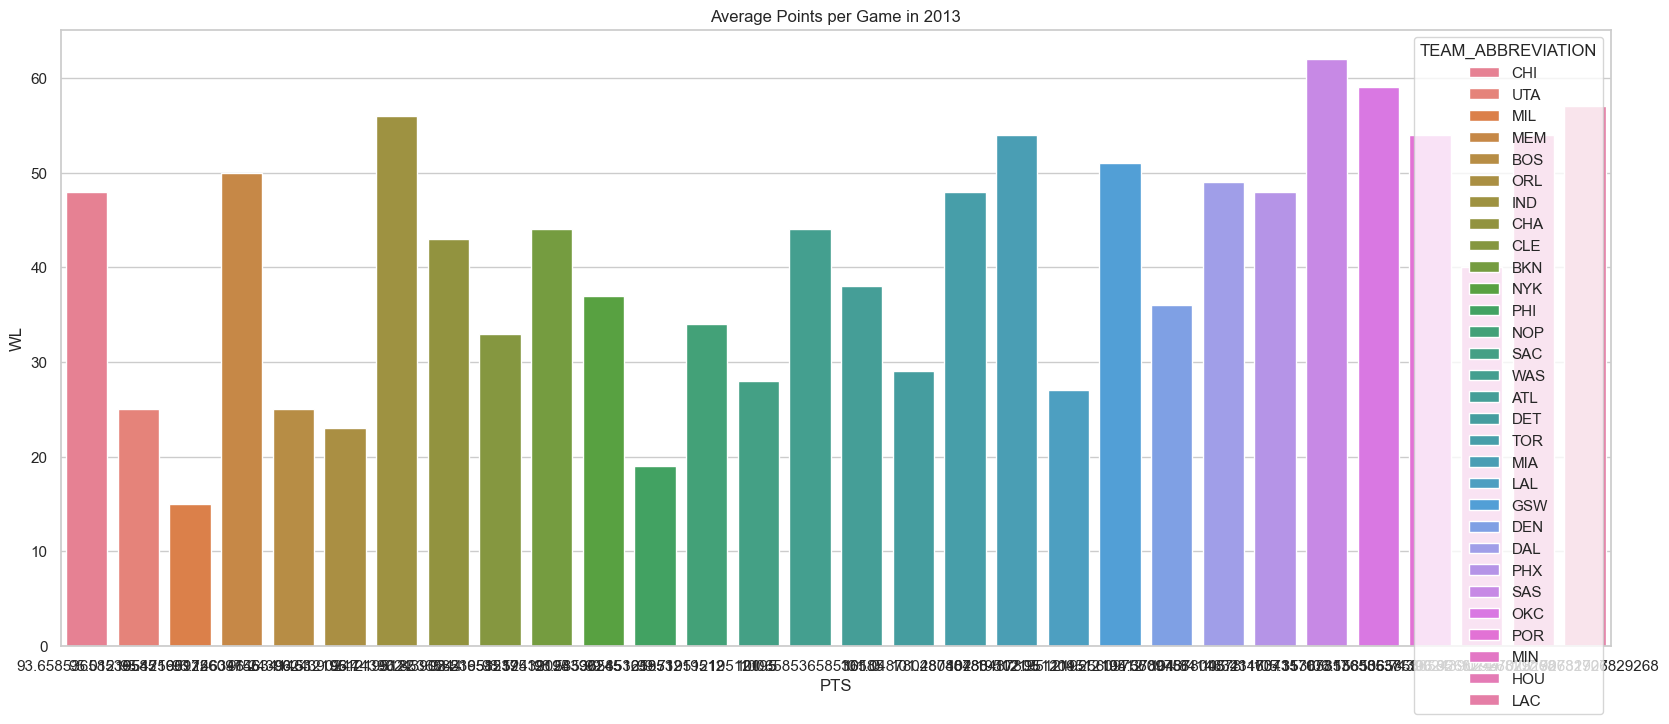

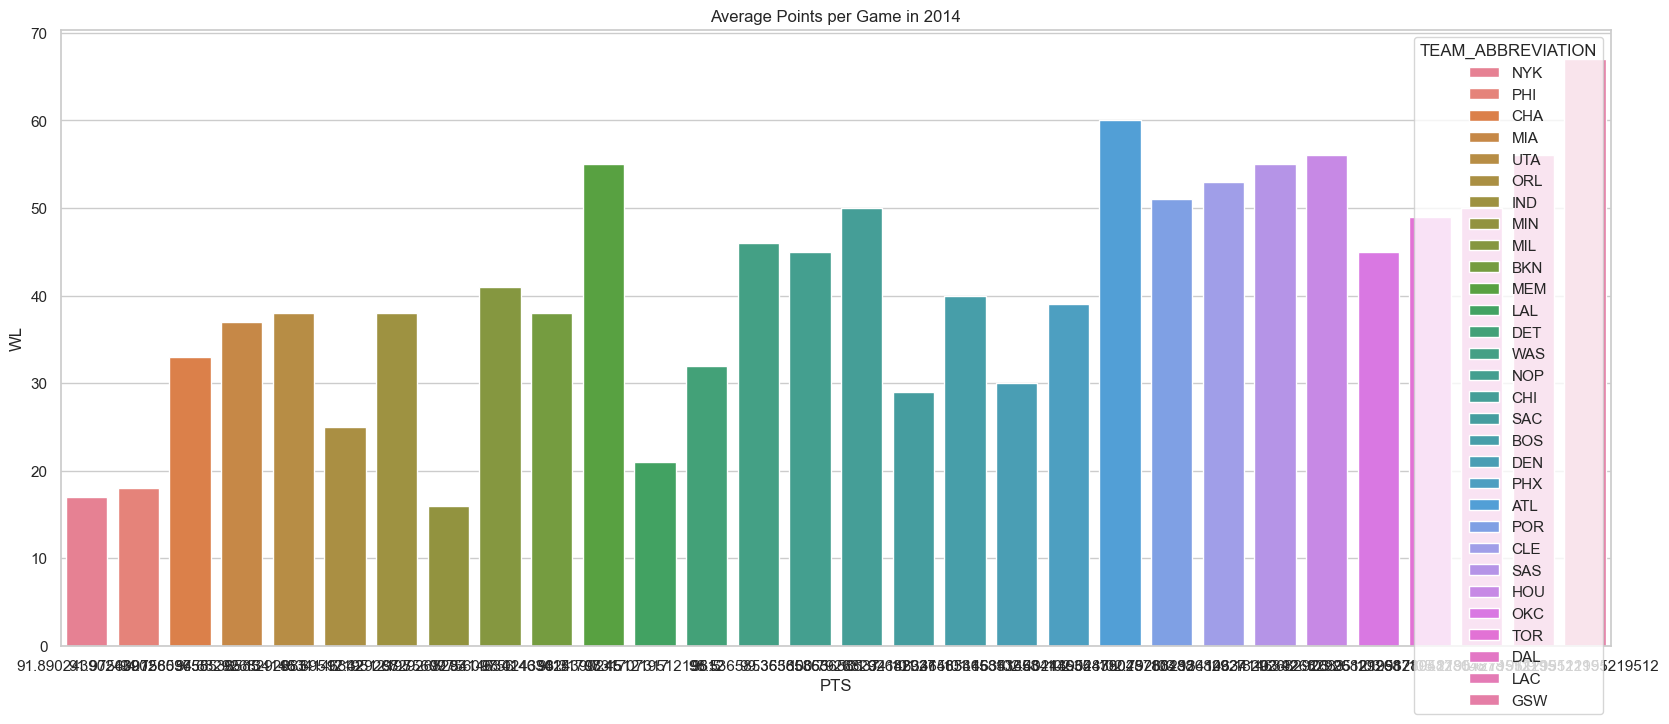

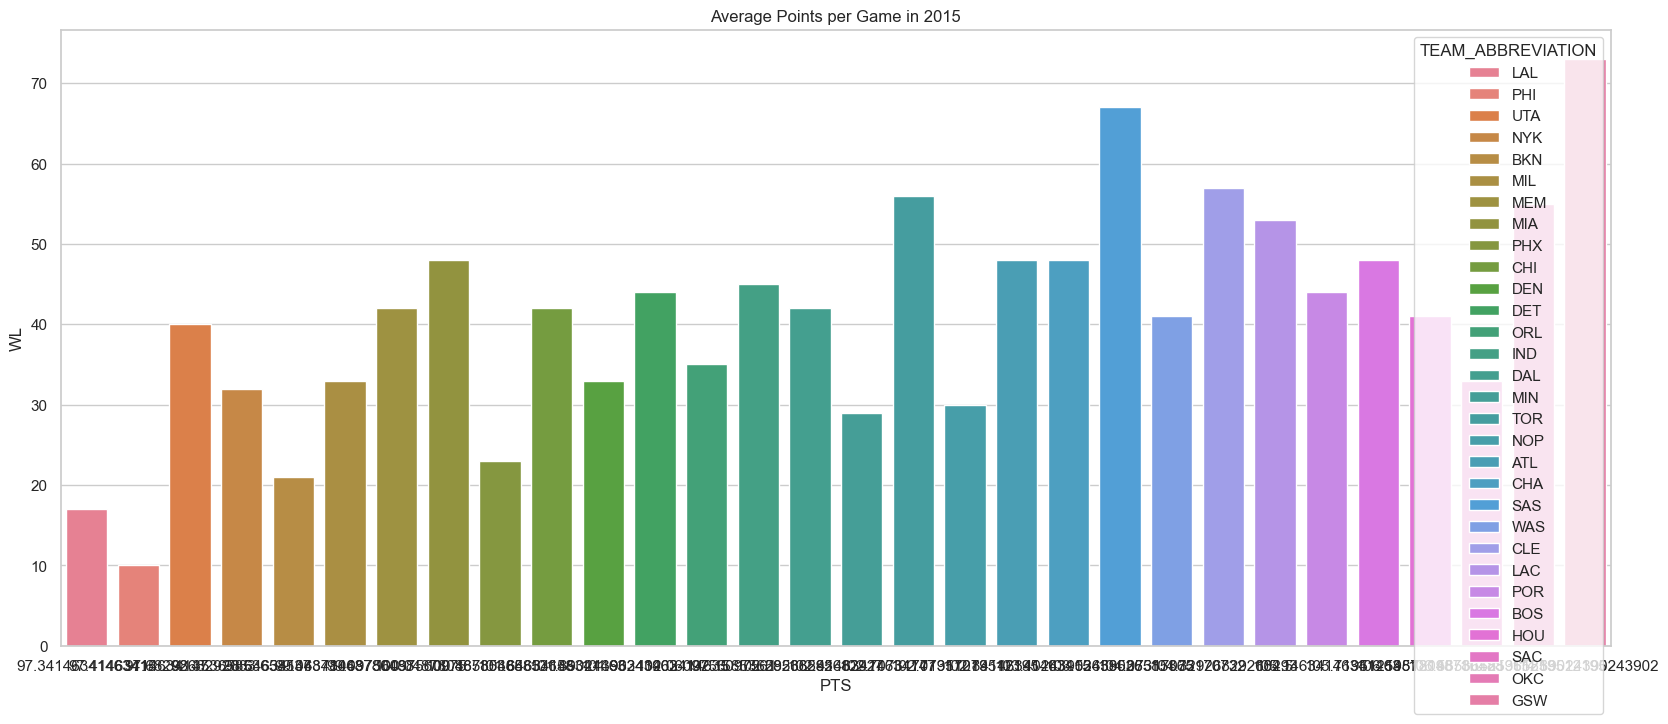

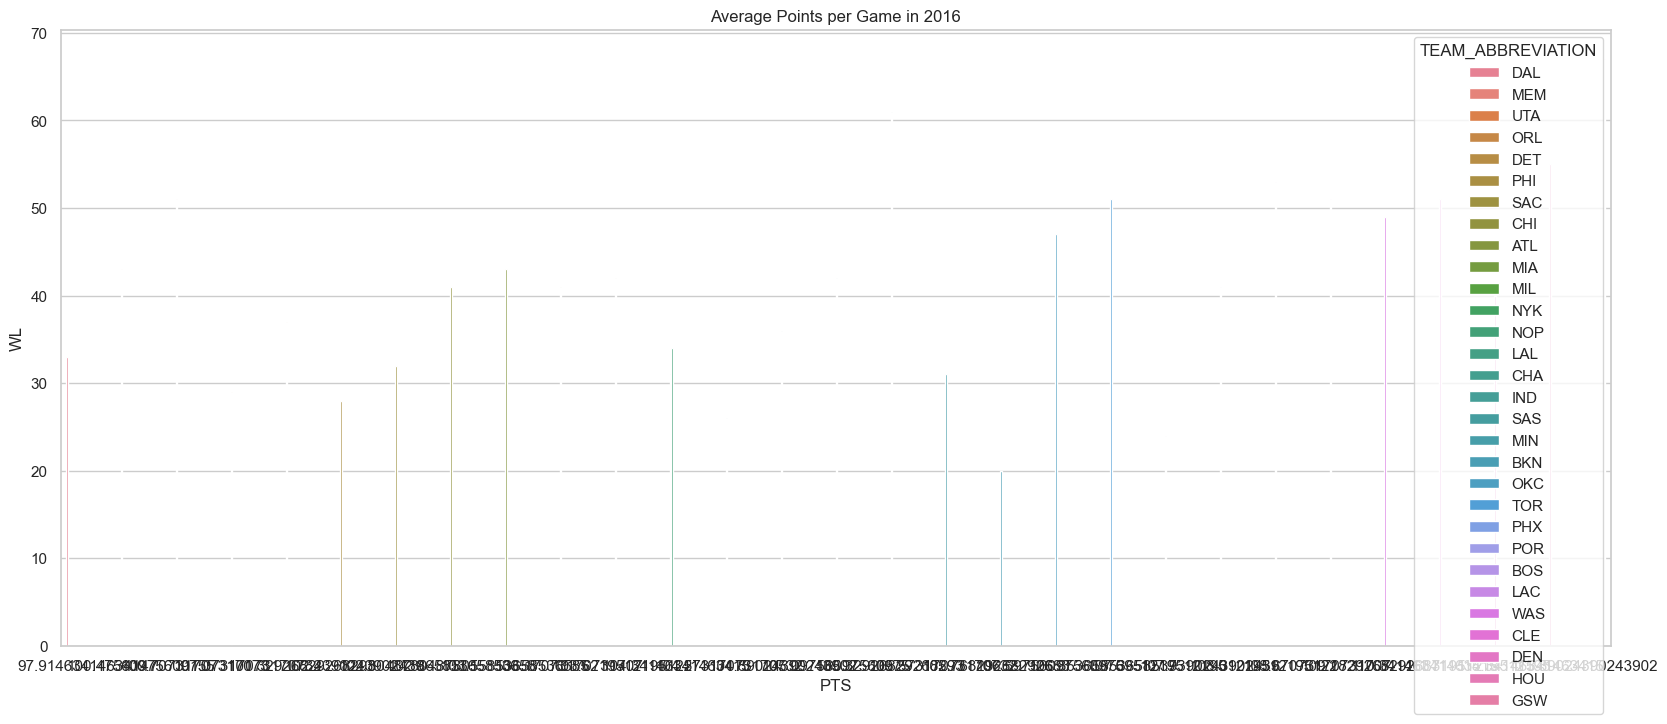

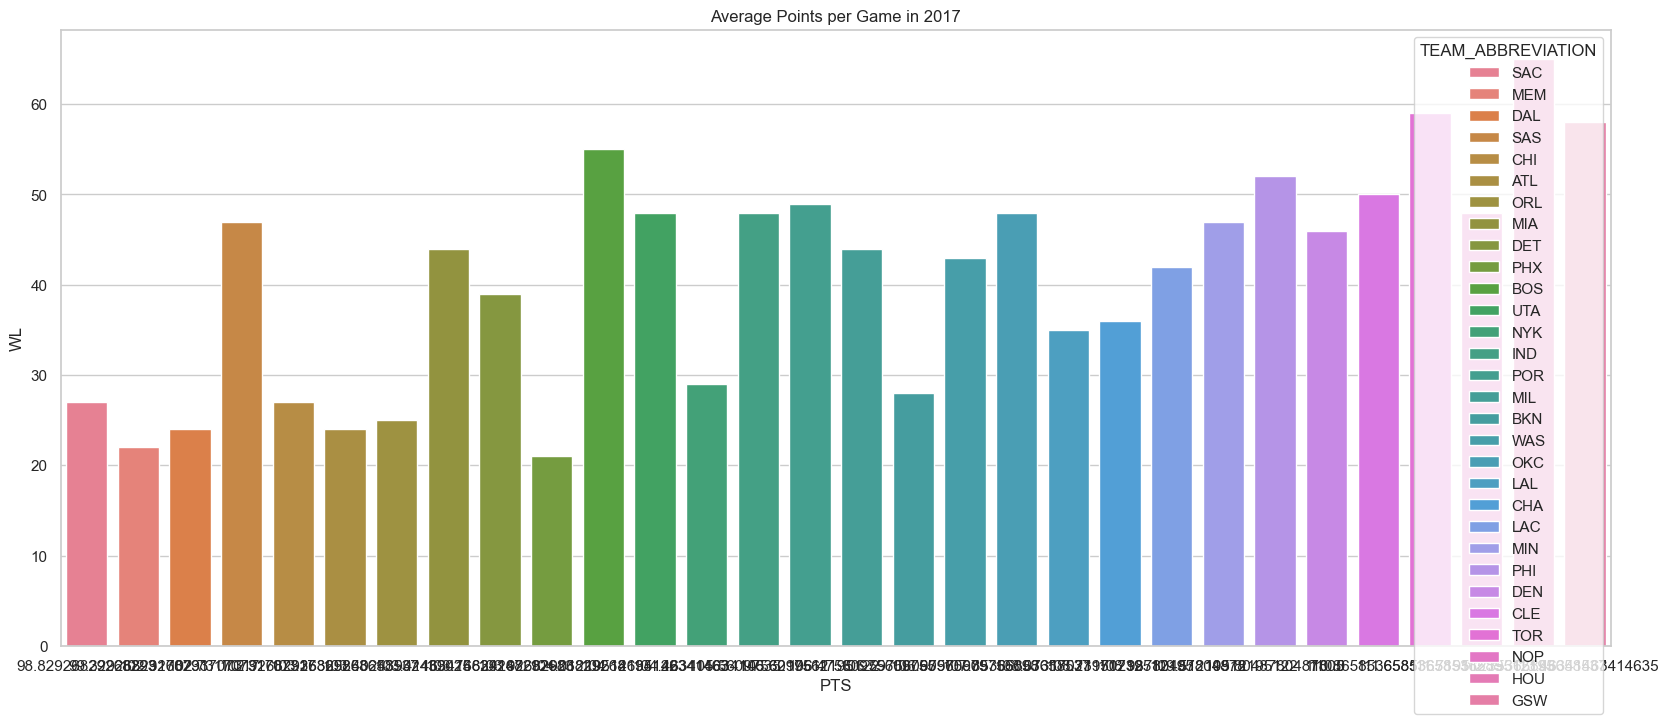

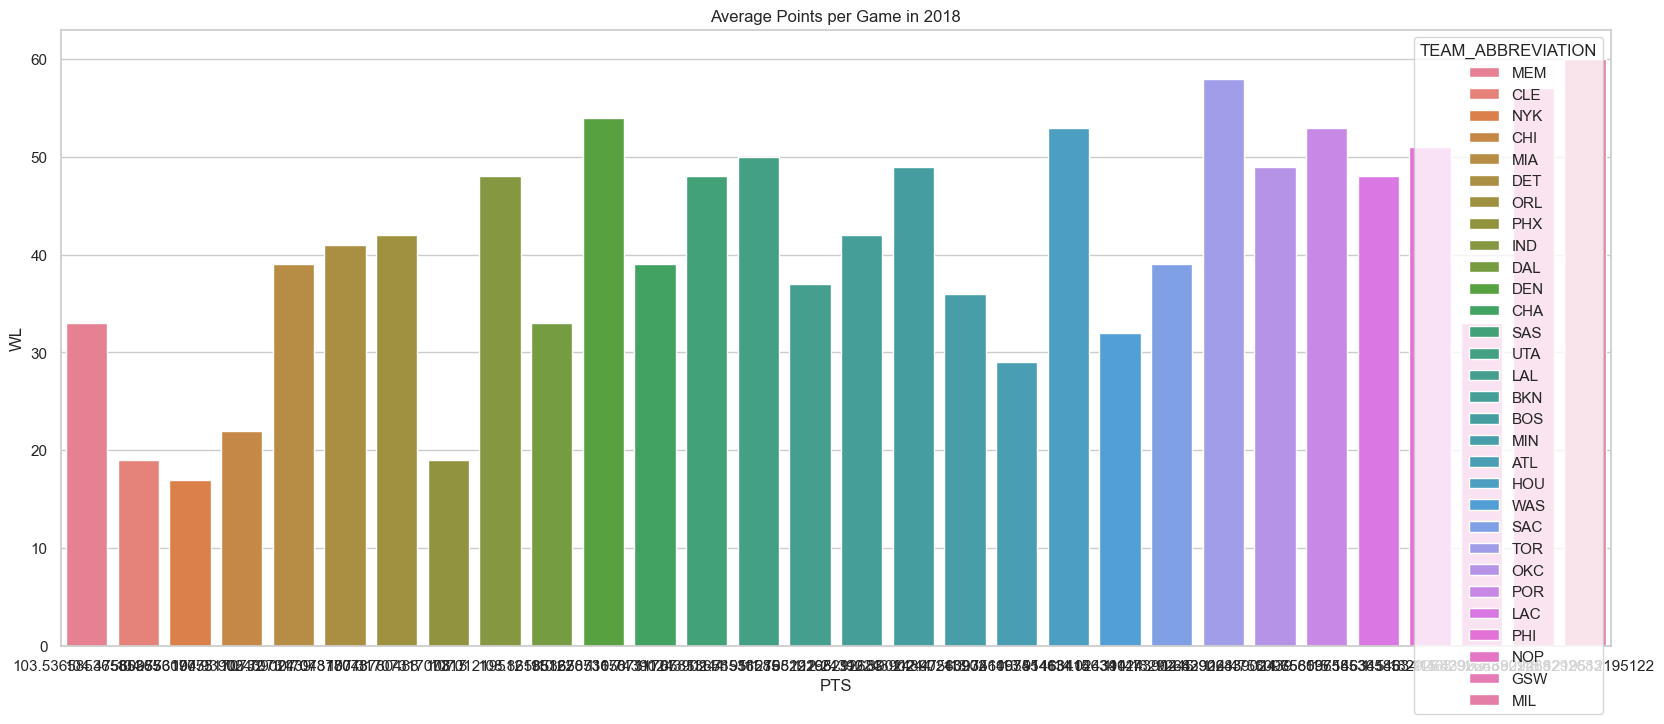

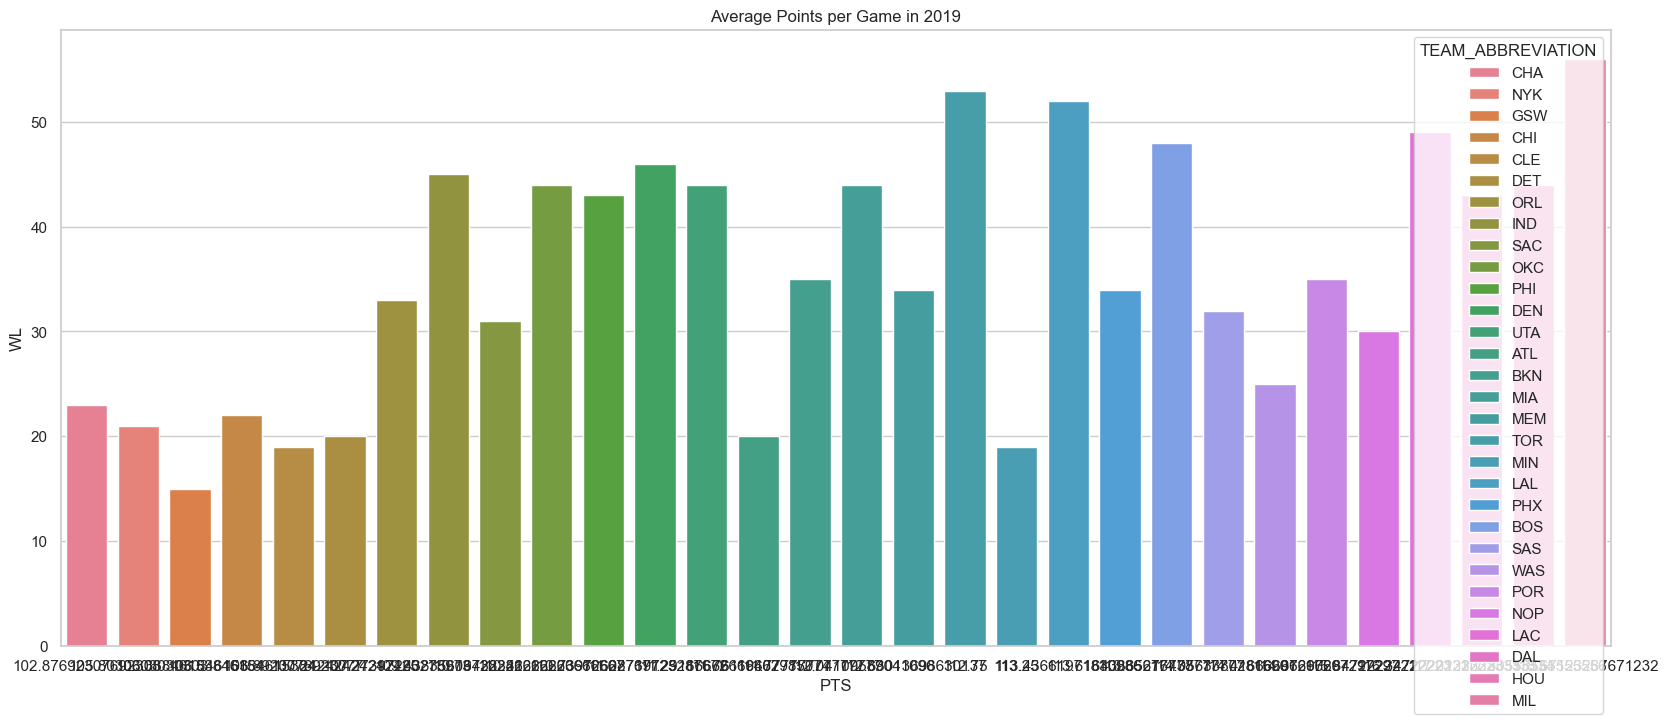

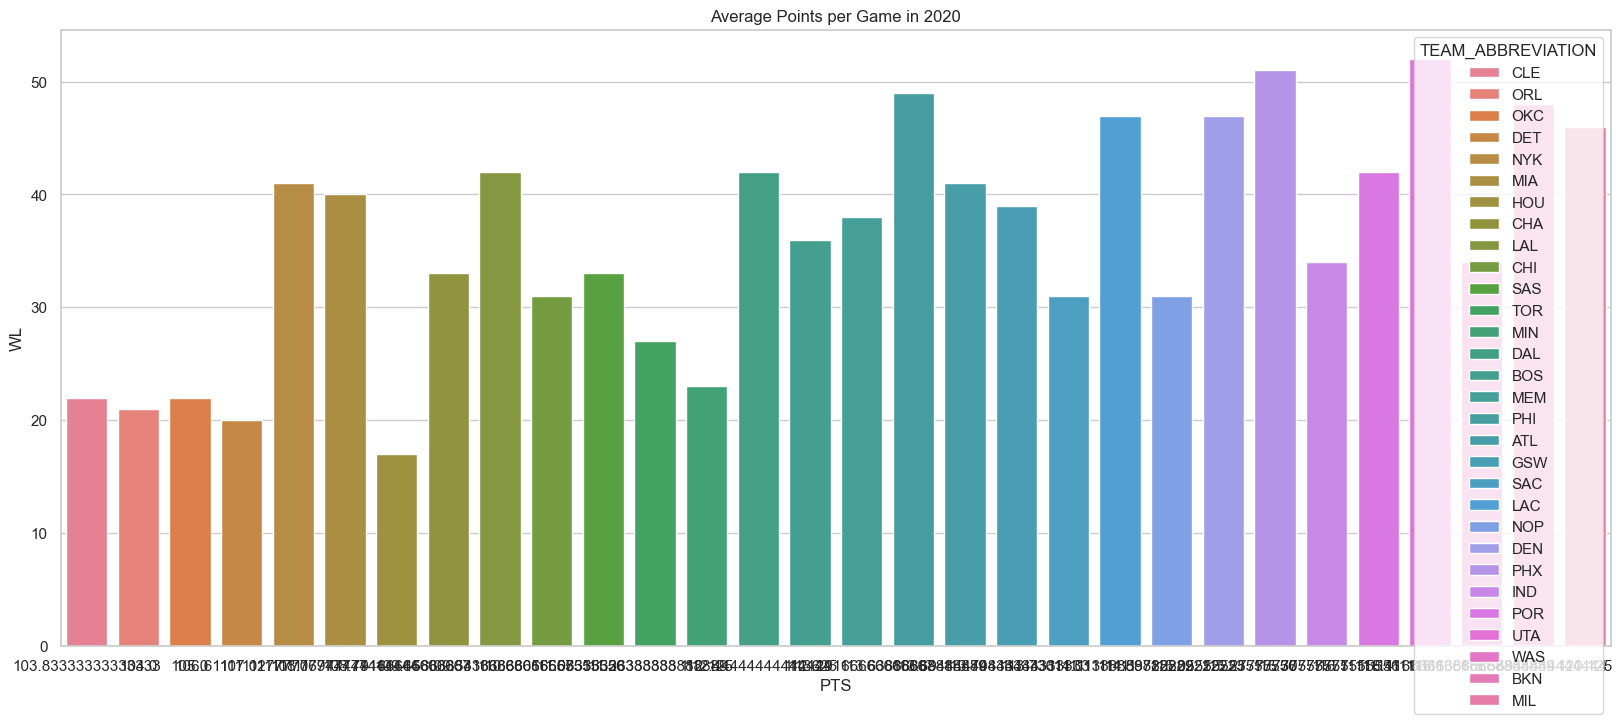

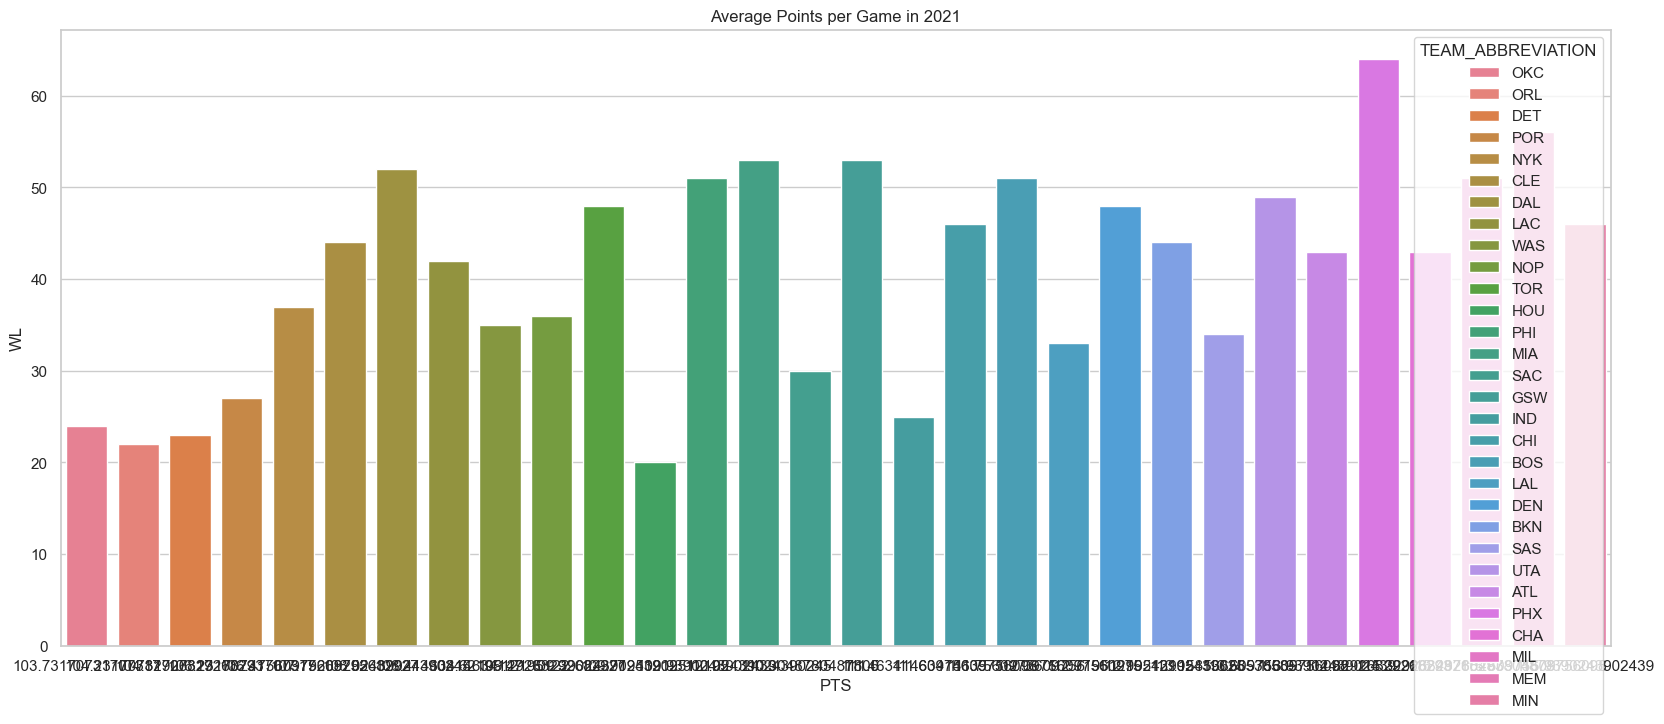

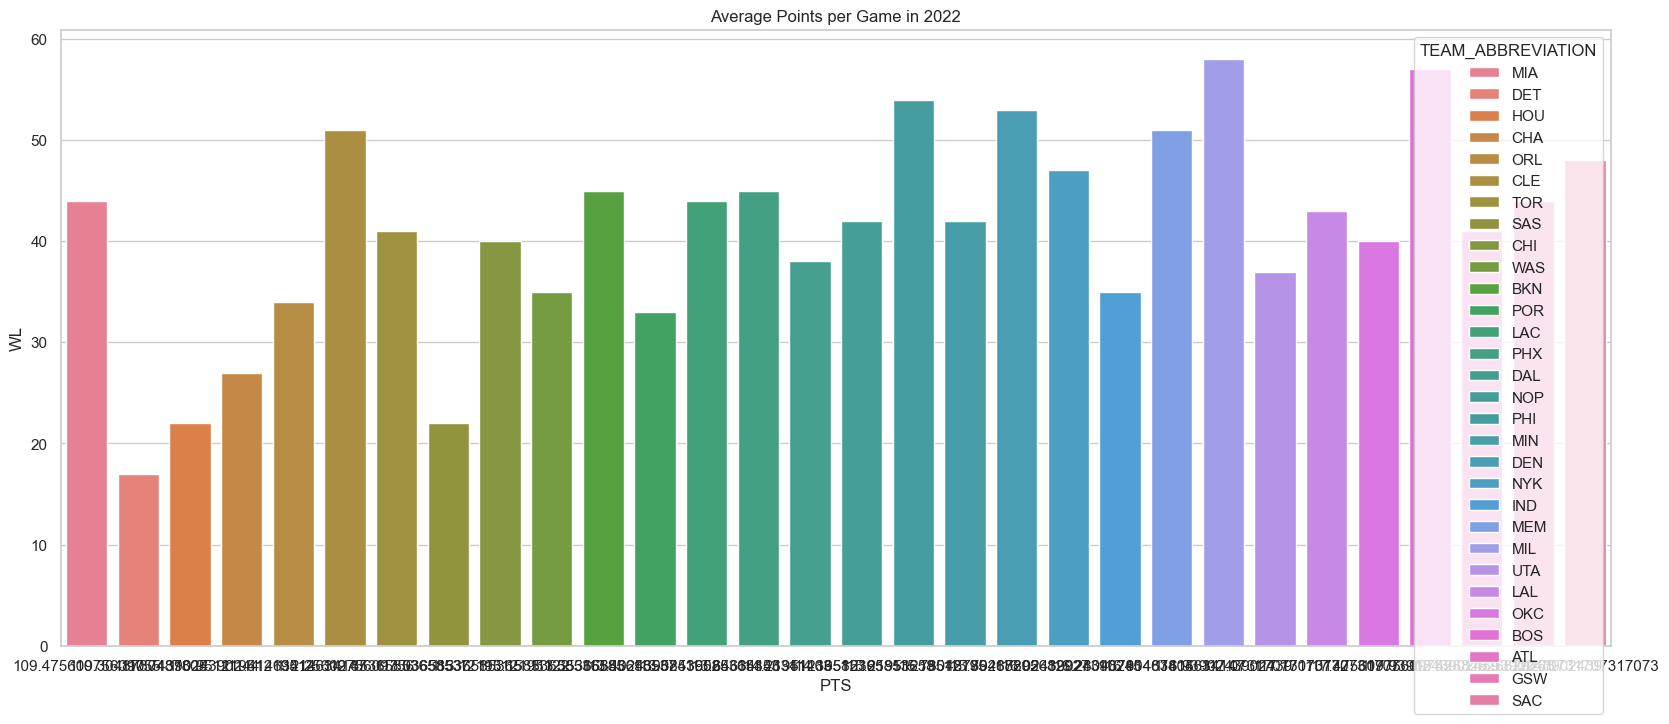

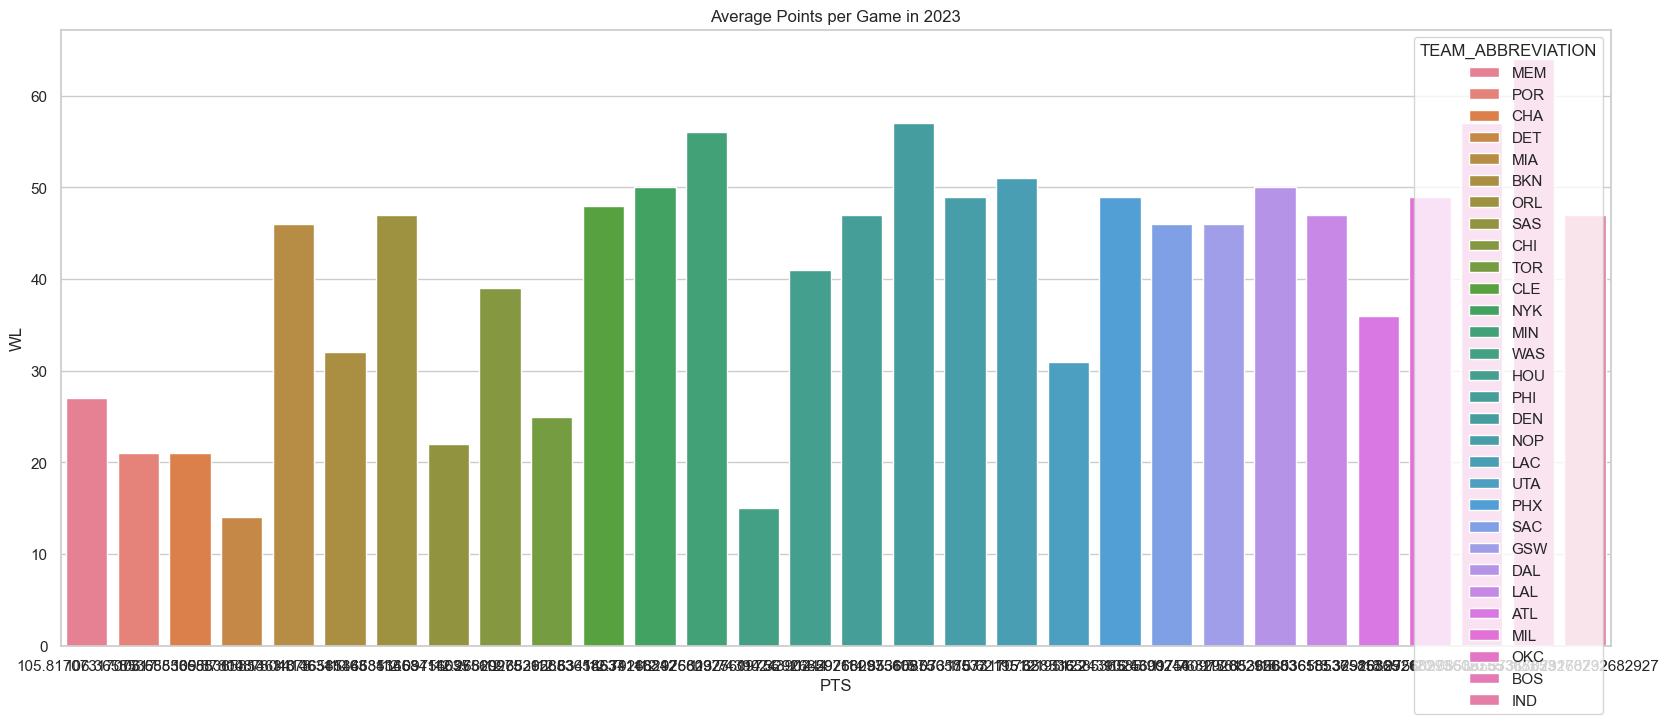

In [140]:
for year in range(2010,2024):
    plt.figure(figsize=(20, 8))  # Increase width and height for better readability
    plt.tight_layout()
    plt.title(f"Average Points per Game in {year}")
    sns.set_theme(style="whitegrid")  # You can also try 'darkgrid', 'white', 'dark', or 'ticks'
    ap= getTeamAvgPointsBySeason(regular_games_total,season=year)
    sns.barplot(data=ap, x='PTS', y='WL', hue='TEAM_ABBREVIATION')
    savefig = f"figures/average_points_per_game_{year}.png"
    plt.savefig(savefig)
    plt.show()

**As we can deduce by the graphics there is also no direct correlation between the average points per-game and the number of wins for each team, in a season, so it this will probably be a multi-dimensional features model, and the data exploration process may come at a cost of absence of visual representation of the data**

In [129]:
def getPlayerStatsBySeason(scores,season,playername=None):
    """
    Function to get the stats of a player in a season
    :param player_name: player name
    :param season: season
    :return: stats of the player in the season
    """
    season=convert_int_season_to_str(season)
    scores = scores[scores['minutes'].notna()].copy()
    scores['minutesParsed'] = scores['minutes'].apply(convert_min_to_float)
    playersGrouped=scores.groupby(['personName','season_year'])
    playersAggregated=playersGrouped.agg(
        {
            ''
            'points':'mean',
            'assists':'mean',
            'reboundsTotal':'mean',
            'steals':'mean',
            'blocks':'mean',
            'turnovers':'mean',
            'minutesParsed':'mean',
            'fieldGoalsMade':'mean',
            'fieldGoalsPercentage':'mean',
            'threePointersMade':'mean',
            'threePointersPercentage':'mean'
        }).reset_index()
    games_of_player_on_season=playersAggregated[playersAggregated['season_year']==season]
    if playername is not None:
        games_of_player_on_season=games_of_player_on_season[games_of_player_on_season['personName'].str.contains(playername,case=False)]
    if len(games_of_player_on_season)==0:
        return 0,0
    return games_of_player_on_season

In [130]:
def getMatchupByTeamBySeason(scores,team_tag_home,team_tag_visitor,season=False):
    """
    Function to get the matchup of a team in a season
    :param team_tag: team tag
    :optional param season: season to filter the data by season 
    :return: matchup of the team in the season
    """
    teams=scores.filter(items=['SEASON_YEAR','TEAM_ABBREVIATION','MATCHUP','TEAM_ID','WL','FGA','FGM'])
    if season is not False:
        teams=teams[teams['SEASON_YEAR']==season]
    mathcup_tag=team_tag_home+" vs. "+team_tag_visitor 
    mathcup_tag_visitor=team_tag_visitor+" vs. "+team_tag_home
    teams['MATCHUP_STANDARD'] = teams['MATCHUP'].str.replace("@", "vs.")
    teams=pd.concat([teams[teams['MATCHUP_STANDARD'] ==  mathcup_tag],teams[teams['MATCHUP_STANDARD']==  mathcup_tag_visitor]],ignore_index=True)
    if len(teams)==0:
        return 
    return teams.filter(items=['SEASON_YEAR','TEAM_ABBREVIATION','MATCHUP_STANDARD','TEAM_ID','WL','FGA','FGM'])

In [132]:
gamesPlayerStatsLe=getPlayerStatsBySeason(regular_season_all_parts,'2021-22','LeBro');
print(gamesPlayerStatsLe.shape)
print(gamesPlayerStatsLe)

(1, 13)
        personName season_year     points   assists  reboundsTotal    steals  \
4443  LeBron James     2021-22  30.267857  6.232143       8.196429  1.303571   

        blocks  turnovers  minutesParsed  fieldGoalsMade  \
4443  1.053571        3.5      37.220833       11.428571   

      fieldGoalsPercentage  threePointersMade  threePointersPercentage  
4443              0.523964              2.875                 0.355589  
